In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from scipy.stats import zscore
from sklearn.neural_network import MLPRegressor

'''

*** Libraries/Modules and their Uses***
(Model imports need no explanation)

pandas for dealing with the dataset

numpy for using log transformations

train_test_split for splitting the dataset

labelencoder, standardscaler for encoding categorical columns and scaling down votes column

zscore for removing outliers

'''

In [290]:
df=pd.read_excel("Movie_Dataset_Competition.xlsx")

In [ ]:
"""Removing outliers"""

print(f"Original data shape: {df.shape}")
numerical_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numerical_cols]))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

print(f"Cleaned data shape (after outlier removal): {df.shape}")

Original data shape: (1421, 14)
Cleaned data shape (after outlier removal): (1355, 14)


In [ ]:
'''Encoding the categorical columns'''

label_encoders={}
categoricals=['genre','director','writer','star','company','country']

for col in categoricals:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
'''Scaling down the large scale values, ignore the commented code as I was playing around with different transfornations to find out the best one'''

scaler = StandardScaler()
df['votes'] = scaler.fit_transform(df[['votes']])

df['Gross Revenue'] = np.log(df['Gross Revenue'])
df['budget'] = np.log(df['budget'])
# df['votes'] = np.log1p(df['votes'])


# df['Gross Revenue'] = scaler.fit_transform(df[['Gross Revenue']])
# df['budget'] = scaler.fit_transform(df[['budget']])
df['votes'] = scaler.fit_transform(df[['votes']])


In [294]:
X = df[['budget', 'votes', 'runtime', 'genre', 'director', 'writer', 'star', 'company']]
y = df['Gross Revenue']


In [ ]:
'''Creating a new variable for mapping votes and sensitivity, didn't proove to be of much use'''

df['Votes_new']=df['votes']/df['budget']
# X_new=df[['budget', 'Votes_new', 'director', 'writer', 'star', 'company']]

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''Applying models, all the hyperparameters have been tuned after rigorous testing and permutations(Datascientist's life)'''

resultsxnew1={}

#Neural Network has been commented out because it had beenn showing bad results, so ignored
models = {
    "Random Forest": RandomForestRegressor(n_estimators=500, max_depth=10),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=600, learning_rate=0.01, max_depth=6),
    "LightGBM": LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=6),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6),
    # "Neural Network": MLPRegressor(hidden_layer_sizes=(1024,512,128, 64), activation='relu', solver='adam', max_iter=500)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = (mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape=mean_absolute_percentage_error(y_test,y_pred)

    resultsxnew1[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2 , "MAPE": mape}

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1454
[LightGBM] [Info] Number of data points in the train set: 1084, number of used features: 8
[LightGBM] [Info] Start training from score 18.033981
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [298]:
resultsxnew1

{'Random Forest': {'MAE': 0.4656443110249984,
  'RMSE': 0.3971904280750825,
  'R2 Score': 0.8181916498581309,
  'MAPE': 0.026171395411886608},
 'Gradient Boosting': {'MAE': 0.466982492615086,
  'RMSE': 0.39253144745069785,
  'R2 Score': 0.8203242329235572,
  'MAPE': 0.026237810214517224},
 'LightGBM': {'MAE': 0.5021464809961215,
  'RMSE': 0.4314290787381144,
  'R2 Score': 0.8025193875171237,
  'MAPE': 0.028177818921960477},
 'XGBoost': {'MAE': 0.4810387678815592,
  'RMSE': 0.40898632705031845,
  'R2 Score': 0.8127922424718018,
  'MAPE': 0.027030630238554905}}

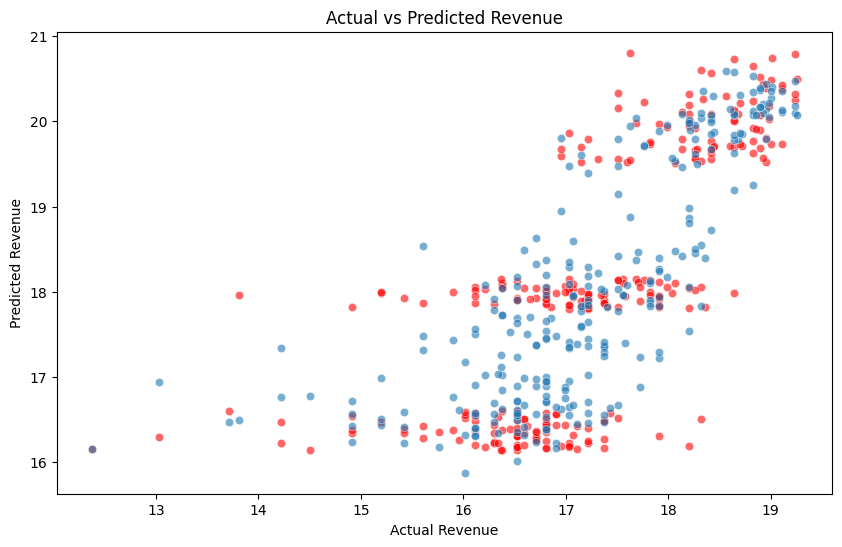

In [ ]:
'''Plotting the predictions'''
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for actual vs predicted revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['budget'], y=y_test, alpha=0.6,color='red')
sns.scatterplot(x=X_test['budget'], y=y_pred, alpha=0.6)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()


In [ ]:
'''For analysis, had to read the dataset again as all the values had been scaled down or transformed,
due to time crunch, this is all we could derive from the dataset as of now'''

df=pd.read_excel("Movie_Dataset_Competition.xlsx")
df["hit"] = df["Gross Revenue"] > (df["budget"] * 3)
hit = df[df['hit']]

best_actors = hit['star'].value_counts().head(10) 
best_writers = hit['writer'].value_counts().head(10)  
best_directors = hit['director'].value_counts().head(10)  

print("Top 10 Actors with most hit films:\n", best_actors)
print("Top 10 Writers with most hit films:\n", best_writers)
print("Top 10 Directors with most hit films:\n", best_directors)


Top 10 Actors with most hit films:
 star
Tom Hanks            13
Tom Cruise           11
Will Smith            9
Robert Downey Jr.     9
Leonardo DiCaprio     8
Mike Myers            7
Daniel Radcliffe      7
Harrison Ford         7
Ben Stiller           6
Dwayne Johnson        6
Name: count, dtype: int64
Top 10 Writers with most hit films:
 writer
John Lasseter         6
Cinco Paul            5
J.K. Rowling          5
Lawrence Kasdan       5
Jonathan Aibel        5
Stephen King          5
Melissa Rosenberg     5
Bruce Geller          5
Chris Morgan          5
Christopher Markus    4
Name: count, dtype: int64
Top 10 Directors with most hit films:
 director
Steven Spielberg     14
Michael Bay           7
Peter Jackson         6
Ron Howard            6
Bryan Singer          5
Chris Columbus        5
Tim Burton            5
Christopher Nolan     5
Robert Zemeckis       5
Jay Roach             5
Name: count, dtype: int64
